In [4]:
import keras
import numpy as np
import os 
import cv2
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import sys
import random
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2
from sklearn.utils import shuffle
from keras.utils import to_categorical
warnings.filterwarnings("ignore")


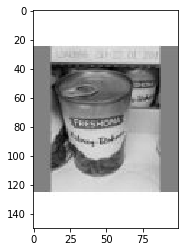

In [5]:
DIR = "C:/Users/Berk/desktop/data"
DIREC = "C:/Users/Berk/desktop/test"
classes = ["BEANS","CAKE","CANDY","CEREAL","CHIPS","CHOCOLATE","COFFEE","HONEY","JAM","JUICE",
           "MILK","NUTS","PASTA","RICE","SPICES","SUGAR","TEA","TOMATO_SAUCE","VINEGAR","WATER"]
for x in classes:  
    path = os.path.join(DIR,x)  # creating path to class folders
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # converting it to array
        plt.imshow(img_array, cmap="gray") 
        plt.show()  
        break 
    break  # to see only 1 photo for checking.
    
    #photos are 100x150 as requested.

In [6]:
train_data = []

def trainData():
    for x in classes:
        path = os.path.join(DIR,x)
        classnum = classes.index(x)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(50,50)) #Shaping images as 50x50 for a faster learning.
                train_data.append([new_array,classnum])
            except Exception as e: #just eliminating the images that opencv cannot shape.
                pass
        
trainData()
train_data = shuffle(train_data, random_state=0)

x_train = []
labels = []
for features,label in train_data:
    x_train.append(features)
    labels.append(label)
x_train = np.array(x_train).reshape(-1,50,50,1)
x_train = x_train/255.0 #normalizing the data.



In [7]:
train_data[0]


[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 9]

In [8]:
test_data=[]

def testData():
    for x in classes:
        path = os.path.join(DIREC,x)
        classnum = classes.index(x)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(50,50)) 
                test_data.append([new_array,classnum])
            except Exception as e: #just eliminating the images that opencv cannot shape.
                pass
        
testData()
test_data = shuffle(test_data, random_state = 0)

x_test = []
testLabels = []

for features,label in test_data:
    x_test.append(features)
    testLabels.append(label)
x_test = np.array(x_test).reshape(-1,50,50,1)
x_test = x_test/255.0 #normalizing the data.


In [9]:
len(x_train), len(x_test), len(classes)

(3319, 1019, 20)

In [10]:
def createModel():
    
    model = Sequential()

    #input layer
    model.add(Conv2D(32, (3, 3),padding='same', input_shape=x_train.shape[1:]))   
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #hidden layer 1
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #hidden layer 2                                               
    model.add(Conv2D(64, (3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, kernel_regularizer = l2(0.001)))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))

    model.add(Dense(20))
    model.add(Activation("softmax"))

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [19]:
train_labels = to_categorical(labels)
test_labels = to_categorical(testLabels)
model = createModel()

In [20]:
history = model.fit(x_train, train_labels, batch_size=256, epochs=150, validation_split = 0.075)

Train on 3070 samples, validate on 249 samples
Epoch 1/150
3070/3070 [==============================] - 2s 774us/sample - loss: 3.1841 - acc: 0.0687 - val_loss: 3.1441 - val_acc: 0.0843
Epoch 2/150
3070/3070 [==============================] - 1s 427us/sample - loss: 3.1205 - acc: 0.0808 - val_loss: 3.0962 - val_acc: 0.0602
Epoch 3/150
3070/3070 [==============================] - 1s 456us/sample - loss: 3.0737 - acc: 0.0906 - val_loss: 3.0501 - val_acc: 0.1205
Epoch 4/150
3070/3070 [==============================] - 1s 450us/sample - loss: 3.0083 - acc: 0.1016 - val_loss: 2.9778 - val_acc: 0.1245
Epoch 5/150
3070/3070 [==============================] - 1s 450us/sample - loss: 2.9625 - acc: 0.1231 - val_loss: 2.9169 - val_acc: 0.1004
Epoch 6/150
3070/3070 [==============================] - 1s 451us/sample - loss: 2.9022 - acc: 0.1342 - val_loss: 2.8841 - val_acc: 0.1526
Epoch 7/150
3070/3070 [==============================] - 1s 469us/sample - loss: 2.8823 - acc: 0.1401 - val_loss: 2.846

3070/3070 [==============================] - 1s 353us/sample - loss: 1.8538 - acc: 0.4537 - val_loss: 2.2757 - val_acc: 0.3414
Epoch 60/150
3070/3070 [==============================] - 1s 357us/sample - loss: 1.8405 - acc: 0.4573 - val_loss: 2.3119 - val_acc: 0.3333
Epoch 61/150
3070/3070 [==============================] - 1s 359us/sample - loss: 1.8383 - acc: 0.4577 - val_loss: 2.3240 - val_acc: 0.3454
Epoch 62/150
3070/3070 [==============================] - 1s 354us/sample - loss: 1.8003 - acc: 0.4664 - val_loss: 2.3203 - val_acc: 0.3333
Epoch 63/150
3070/3070 [==============================] - 1s 353us/sample - loss: 1.7789 - acc: 0.4857 - val_loss: 2.2965 - val_acc: 0.3213
Epoch 64/150
3070/3070 [==============================] - 1s 352us/sample - loss: 1.7758 - acc: 0.4704 - val_loss: 2.2659 - val_acc: 0.3936
Epoch 65/150
3070/3070 [==============================] - 1s 352us/sample - loss: 1.7577 - acc: 0.4717 - val_loss: 2.3091 - val_acc: 0.3414
Epoch 66/150
3070/3070 [=========

3070/3070 [==============================] - 1s 353us/sample - loss: 1.1742 - acc: 0.6697 - val_loss: 2.4868 - val_acc: 0.3855
Epoch 118/150
3070/3070 [==============================] - 1s 354us/sample - loss: 1.1586 - acc: 0.6713 - val_loss: 2.4709 - val_acc: 0.3534
Epoch 119/150
3070/3070 [==============================] - 1s 354us/sample - loss: 1.1996 - acc: 0.6593 - val_loss: 2.4904 - val_acc: 0.3855
Epoch 120/150
3070/3070 [==============================] - 1s 352us/sample - loss: 1.1772 - acc: 0.6671 - val_loss: 2.4757 - val_acc: 0.3815
Epoch 121/150
3070/3070 [==============================] - 1s 352us/sample - loss: 1.1654 - acc: 0.6730 - val_loss: 2.5213 - val_acc: 0.3936
Epoch 122/150
3070/3070 [==============================] - 1s 351us/sample - loss: 1.1459 - acc: 0.6759 - val_loss: 2.5758 - val_acc: 0.3414
Epoch 123/150
3070/3070 [==============================] - 1s 356us/sample - loss: 1.1202 - acc: 0.6779 - val_loss: 2.3793 - val_acc: 0.4056
Epoch 124/150
3070/3070 [==

In [21]:
model.evaluate(x_test,test_labels) # calculating the test lost and accuracy.
model.save("lastmodel.model") #saving the model.

1019/1019 [==============================] - 0s 275us/sample - loss: 3.1987 - acc: 0.2944


In [22]:
def Plot_loss_acc(historyobj):
    # Loss Curve...
    plt.figure(figsize=[6,4])
    plt.plot(historyobj.history['loss'],'r',linewidth=3.0)
    plt.plot(historyobj.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.title('Loss Curves',fontsize=14)
    
    # Accuracy Curve...
    plt.figure(figsize=[6,4])
    plt.plot(historyobj.history['acc'],'r',linewidth=3.0)
    plt.plot(historyobj.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.title('Accuracy Curves',fontsize=14)

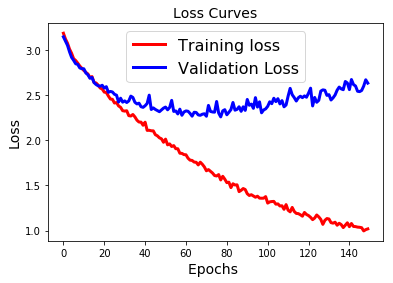

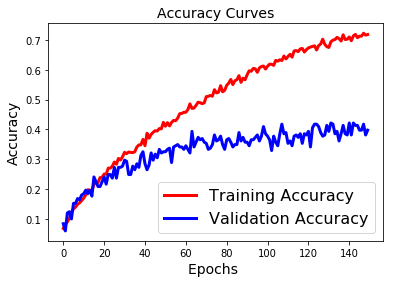

In [23]:
Plot_loss_acc(history)

In [16]:
model2 = createModel()
datagen = ImageDataGenerator(
        zoom_range=0.2, 
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False
        )

In [17]:
history2 = model2.fit_generator(datagen.flow(x_train,train_labels,batch_size=256), 
                                steps_per_epoch=int(np.ceil(x_train.shape[0]/float(256))),
                                epochs=100,
                                shuffle = True,
                                validation_data=(x_test,test_labels),
                                use_multiprocessing=False,
                                workers=1)

Epoch 1/100
13/13 [==============================] - 2s 152ms/step - loss: 3.1794 - acc: 0.0684 - val_loss: 3.1461 - val_acc: 0.0530
Epoch 2/100
13/13 [==============================] - 1s 110ms/step - loss: 3.1252 - acc: 0.0717 - val_loss: 3.1088 - val_acc: 0.0393
Epoch 3/100
13/13 [==============================] - 2s 135ms/step - loss: 3.0839 - acc: 0.0817 - val_loss: 3.0796 - val_acc: 0.0883
Epoch 4/100
13/13 [==============================] - 2s 135ms/step - loss: 3.0382 - acc: 0.0865 - val_loss: 3.0303 - val_acc: 0.1129
Epoch 5/100
13/13 [==============================] - 2s 129ms/step - loss: 2.9882 - acc: 0.1073 - val_loss: 3.0029 - val_acc: 0.0952
Epoch 6/100
13/13 [==============================] - 2s 130ms/step - loss: 2.9638 - acc: 0.1049 - val_loss: 2.9537 - val_acc: 0.1305
Epoch 7/100
13/13 [==============================] - 2s 131ms/step - loss: 2.9349 - acc: 0.1187 - val_loss: 2.9064 - val_acc: 0.1295
Epoch 8/100
13/13 [==============================] - 2s 136ms/step - 

Epoch 38/100
13/13 [==============================] - 2s 139ms/step - loss: 2.6201 - acc: 0.2169 - val_loss: 2.7033 - val_acc: 0.1904
Epoch 39/100
13/13 [==============================] - 2s 134ms/step - loss: 2.5994 - acc: 0.2332 - val_loss: 2.6562 - val_acc: 0.2149
Epoch 40/100
13/13 [==============================] - 2s 130ms/step - loss: 2.5725 - acc: 0.2284 - val_loss: 2.6231 - val_acc: 0.2022
Epoch 41/100
13/13 [==============================] - 2s 132ms/step - loss: 2.5726 - acc: 0.2356 - val_loss: 2.6071 - val_acc: 0.2355
Epoch 42/100
13/13 [==============================] - 2s 137ms/step - loss: 2.5755 - acc: 0.2311 - val_loss: 2.6318 - val_acc: 0.2041
Epoch 43/100
13/13 [==============================] - 2s 136ms/step - loss: 2.5549 - acc: 0.2356 - val_loss: 2.6184 - val_acc: 0.2130
Epoch 44/100
13/13 [==============================] - 2s 135ms/step - loss: 2.5434 - acc: 0.2468 - val_loss: 2.6395 - val_acc: 0.2179
Epoch 45/100
13/13 [==============================] - 2s 130ms

Epoch 75/100
13/13 [==============================] - 3s 211ms/step - loss: 2.3785 - acc: 0.2962 - val_loss: 2.5602 - val_acc: 0.2601
Epoch 76/100
13/13 [==============================] - 3s 194ms/step - loss: 2.3615 - acc: 0.2983 - val_loss: 2.5293 - val_acc: 0.2650
Epoch 77/100
13/13 [==============================] - 2s 188ms/step - loss: 2.3521 - acc: 0.2880 - val_loss: 2.5737 - val_acc: 0.2571
Epoch 78/100
13/13 [==============================] - 2s 181ms/step - loss: 2.3544 - acc: 0.2959 - val_loss: 2.5243 - val_acc: 0.2601
Epoch 79/100
13/13 [==============================] - 2s 174ms/step - loss: 2.3504 - acc: 0.3067 - val_loss: 2.5060 - val_acc: 0.2709
Epoch 80/100
13/13 [==============================] - 2s 173ms/step - loss: 2.3279 - acc: 0.3043 - val_loss: 2.4858 - val_acc: 0.2738
Epoch 81/100
13/13 [==============================] - 2s 174ms/step - loss: 2.3344 - acc: 0.3103 - val_loss: 2.5509 - val_acc: 0.2679
Epoch 82/100
13/13 [==============================] - 2s 167ms

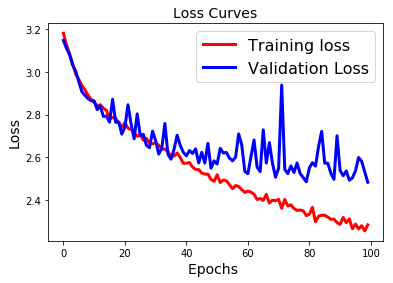

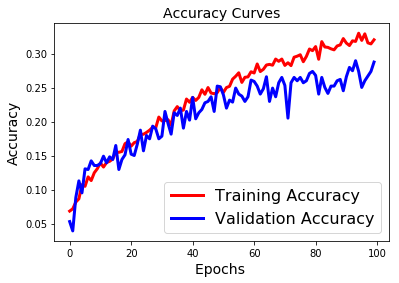

In [24]:
Plot_loss_acc(history2)

In [26]:
prediction = model.predict(x_test, batch_size=20, max_queue_size=10, workers=1, use_multiprocessing=False)
print(classes[int(prediction[0][0])])

# Model predicts %30 right. low accuracy. Predicted this one correct though :).

BEANS
